In [1]:
import numpy as np
import librosa
import librosa.display
import os
from matplotlib import pyplot as plt
import random

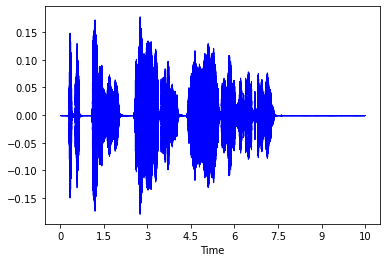

In [2]:
# attempt to load a wave file
wav_data_path = os.path.join("Dataset","fujitou_normal","fujitou_normal_001.wav") 

x, fs = librosa.load(wav_data_path, sr=44100)

librosa.display.waveshow(x, sr=fs, color='blue')

In [3]:
x.shape

(462168,)

<ipython-input-4-e00070e708b3>:2: FutureWarning: Pass y=[ 2.9128509e-05 -9.4395460e-07  3.6090707e-05 ... -6.3290267e-05
  1.2563883e-05 -3.4199227e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)


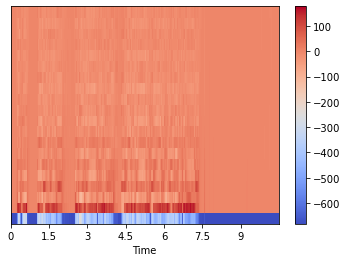

In [4]:
# transfer from wav to mfcc
mfccs = librosa.feature.mfcc(x, sr=fs)
librosa.display.specshow(mfccs, sr=fs, x_axis='time')
plt.colorbar()

Following blocks are adapted from a website: https://qiita.com/atily17/items/ca9c594ec678f241e8bf

In [5]:
# Transfer from wav to mfcc files and save as npy files all together
DATASET_DIR="Dataset"

wavdatas = []

dirlist = os.listdir(DATASET_DIR)
for d in dirlist:
    d = os.path.join(DATASET_DIR, d)
    datalist = os.listdir(d)
    y = [d[d.find("\\")+1:d.find("_")], d[d.find("_") + 1:]] # from file name to determine the correct label
    datalist = [[os.path.join(d,x), y] for x in datalist]
    wavdatas.extend(datalist)

In [6]:
MFCCs_DATA = "MFCCsData"

dirlist = os.listdir(DATASET_DIR)
for d in dirlist:
    os.makedirs(os.path.join(MFCCs_DATA, d), exist_ok=True)

In [7]:
def get_mfcc(datadir):
    x, fs = librosa.load(datadir, sr=44100)
    #x = cut_silence(x)
    mfccs = librosa.feature.mfcc(x, sr=fs)
    mfccs = mfccs[1:]
    return mfccs, x, fs

In [8]:
nn = len(wavdatas)
for i, data in enumerate(wavdatas):
    path_list = data[0].split("\\")
    path_list[0] = MFCCs_DATA
    path_list[2] = path_list[2].replace(".wav", ".npy")
    mfccs_path = "\\".join(path_list)
    mfcc,x,fs = get_mfcc(data[0])
    if i%10 == 0:
        print(i, "/", nn)
    np.save(mfccs_path, mfcc)

<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.1092113e-06 -5.3964563e-06  8.2538909e-06 ... -4.2521147e-05
  2.9740580e-05 -2.7779224e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.7279056e-06  2.0634795e-07  6.6089228e-06 ... -6.8561094e-05
  9.3550800e-05 -7.7291719e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)


0 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.7065014e-05  4.4439403e-05 -4.3411983e-05 ... -1.7861716e-05
  3.0177380e-05 -4.2386131e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 4.7665185e-06 -6.6908315e-06  8.6197906e-06 ...  5.1741872e-06
  2.2137006e-05  6.9278676e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.6989312e-05 -2.4032182e-05  3.7196693e-05 ... -3.2086155e-05
 -4.7302794e-05  4.7963771e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.9081197e-05 -2.0216453e-06 -2.8645814e-05 ... -1.2568962e-05
 -1.53

10 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.2137254e-05 -4.7311663e-05  3.8235081e-05 ...  2.4187146e-05
 -3.1120810e-05  4.0265983e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.9765475e-05 -1.2678379e-05 -9.3577419e-06 ...  1.7100358e-05
 -2.8063476e-05  3.7328140e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.0267044e-05 -5.0091780e-06 -1.3692848e-05 ... -3.5977553e-07
  1.5726646e-06 -4.3690902e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 4.3104598e-07  1.7731014e-05 -1.1787037e-05 ... -1.0512231e-05
  2.30

20 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.0124910e-06  1.8290551e-05 -4.2277890e-05 ...  5.5173889e-05
 -7.6371194e-05  7.5402888e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-6.9680964e-06 -2.1492880e-05  3.8009450e-05 ... -5.6930844e-07
  5.6155518e-06  9.9386061e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.3059697e-05 -2.1930109e-05  3.8705133e-05 ... -4.6157184e-06
  2.5350948e-05 -4.2487842e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 5.7338239e-06 -1.0619337e-05 -1.9501249e-05 ...  1.4008218e-05
  5.21

30 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.3134473e-05  2.3558949e-05 -9.3425251e-06 ...  4.9989914e-05
  3.4858487e-05 -1.2543006e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.8177254e-05  2.3108771e-05  3.2201719e-05 ...  4.3068958e-05
 -2.9455152e-05  2.4762021e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-4.3337599e-07 -3.3814395e-06  8.9647938e-06 ...  7.7914425e-05
 -4.8825616e-05  1.3701485e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 5.7366815e-06 -2.9381312e-05  3.6435667e-05 ... -5.0807546e-05
  5.83

40 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.1971556e-06 -2.1893545e-06  5.4784510e-07 ... -2.2873115e-05
  1.1083949e-05 -5.8809128e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.3067190e-05 -1.8287263e-05 -3.9799448e-05 ...  9.7172342e-06
 -7.9637284e-05  6.1828563e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.9146333e-05 -5.3849384e-05 -5.5309883e-06 ...  5.8238587e-05
 -3.0069235e-05  4.5118253e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.0039073e-05  3.7121259e-05 -8.6180535e-06 ... -2.5455856e-05
 -1.26

50 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.0606746e-05 -7.9304264e-06  3.1981651e-06 ... -2.4333651e-05
  6.9497713e-05 -1.1532106e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 8.7553062e-06 -3.5954457e-05  4.9983715e-05 ... -4.4923083e-05
 -4.4012427e-06  1.1230236e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.1992462e-05  1.0394467e-05 -1.8348081e-05 ...  3.7716836e-05
  9.0936001e-06  6.2041421e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 4.8190603e-05  1.9932372e-06  4.3853652e-05 ... -3.0977757e-05
 -2.57

60 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.20747188e-05  4.25662001e-05  1.29789905e-05 ...  8.47659612e-05
  1.89546554e-05 -2.06548862e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 7.6369097e-06  2.8673257e-05  6.8313129e-05 ...  2.0199821e-05
 -6.7462483e-05  3.9871716e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.4593628e-05 -3.6545574e-05 -2.1345222e-05 ... -2.5725412e-05
 -1.0093352e-05 -4.8313304e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.8441056e-05 -3.1296178e-05 -3.0546511e-05 ...  4.4011693e-05


70 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-7.4962122e-06  2.0882984e-05 -1.4856378e-05 ...  3.6114896e-05
 -2.1153601e-05  1.6232985e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 7.4257650e-06 -5.7216803e-06  5.9464419e-06 ...  6.6020482e-05
 -1.9158169e-05  7.4760479e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 5.5029504e-05  4.0867872e-05  3.3590079e-06 ...  7.5245030e-06
 -7.7273638e-05  7.5250159e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.0988597e-06 -3.1973777e-06  2.3943894e-06 ...  9.8366563e-06
 -8.19

80 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-6.4577858e-07  3.4607991e-05 -1.5868600e-05 ...  1.1443781e-05
 -2.5260875e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 4.5011266e-06 -4.4274802e-05  2.2162800e-07 ... -4.9903127e-05
 -4.8511843e-06  3.3560616e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.1479371e-05 -4.8202332e-05  2.3151201e-06 ... -1.9495958e-05
  1.0323378e-05  1.5579948e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.7020966e-05 -2.9104338e-05  4.9186514e-05 ...  4.0513336e-05
  5.77

90 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.4345860e-05 -5.5654717e-05  6.2019863e-05 ...  1.0813078e-05
  7.6160018e-06  7.3915821e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.9803851e-05  2.7999416e-05 -4.2916286e-05 ... -6.1487153e-05
  3.5530033e-05 -2.6273488e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.6781963e-05  7.9023821e-06  1.6043425e-05 ... -1.2936325e-05
 -1.1713261e-05  1.9270708e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.8083638e-05 -8.0318068e-06 -4.3410637e-06 ... -4.2132287e-05
  8.14

100 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 7.46507612e-06 -1.37057405e-05  2.69182201e-05 ... -2.27165092e-05
  2.58063847e-05 -4.83245412e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-7.9296274e-07 -2.1943072e-07  1.5194443e-06 ...  2.6631300e-05
 -2.0107025e-05 -5.5235978e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.1038737e-06 -5.6262716e-06 -2.6861959e-05 ... -1.9389901e-05
  1.6307429e-05 -4.5490353e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-4.1526000e-05  4.1935218e-05 -2.0862088e-05 ...  2.0309067e-06


110 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 7.4729287e-06 -9.6083540e-06  1.1516350e-05 ...  6.0510520e-05
 -2.5569940e-05  4.8366433e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 5.8828425e-07 -1.8634371e-05  1.2468468e-05 ... -3.8793863e-05
 -4.8678441e-05  8.0268410e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.0202288e-05 -2.8316073e-05  1.3371231e-05 ... -8.4714911e-06
  1.4741998e-05  4.7855306e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.6156521e-06 -1.8609991e-05  1.8828250e-05 ... -3.8199050e-05
  2.13

120 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.3021064e-05  3.0085691e-06  2.3952505e-05 ... -6.9716066e-06
  1.2160084e-05 -1.8813529e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.3071018e-06  2.5519086e-05 -2.6430496e-05 ...  4.0224721e-05
 -3.0917541e-05  6.2793474e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 7.7768191e-06 -6.7981896e-06  4.4883591e-06 ...  2.4383427e-05
 -3.3712873e-05  1.8761226e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.2389307e-05 -6.9983062e-06  2.9281297e-05 ... -2.5069887e-05
  3.32

130 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.8027649e-05  1.5750958e-05  4.2253509e-05 ... -5.3691427e-05
  2.4813628e-06 -5.1461640e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.3584098e-05 -4.2084164e-05 -6.6544594e-06 ... -1.2681896e-05
 -5.8650628e-05  5.1862586e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.4576418e-06  7.8594974e-07 -4.2414435e-05 ...  9.0274134e-06
  3.0305880e-06 -9.2243290e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.1224196e-05 -2.8258928e-06  3.5478421e-05 ... -6.9702706e-05
  6.77

140 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.1500717e-06 -6.5502545e-06  1.5928972e-05 ...  3.3333821e-05
 -4.3263346e-05  3.7974733e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-5.4120806e-06  4.3865246e-05 -7.0992202e-05 ... -1.2172068e-05
 -3.2754931e-06  1.1631720e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.1447861e-05 -2.9329685e-06 -6.8725476e-06 ... -2.4779090e-05
  2.4233712e-05 -9.2307982e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 6.3678326e-06 -7.7218483e-06  1.2911508e-05 ...  2.4972418e-05
 -3.33

150 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.7221173e-05 -1.4371382e-05 -1.3063669e-06 ...  4.5062785e-05
 -3.4114266e-05  8.0489690e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 8.4035573e-06 -7.3374631e-06  4.8559314e-06 ...  2.4567362e-05
  6.2050467e-06 -5.0466601e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 4.6496589e-06 -3.5864003e-05  5.5161203e-05 ... -7.0301780e-06
 -1.9230083e-05  6.0631966e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.6977690e-05  2.7305485e-05 -1.2320004e-05 ... -6.3574330e-06
  2.09

160 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.2243384e-05  1.8427441e-05  3.7681602e-05 ... -3.7018421e-05
  4.7259262e-05 -3.9279224e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-7.78224057e-06  3.51314520e-05 -4.67441569e-05 ... -1.17853115e-05
 -8.71464454e-06  2.01899056e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.5411907e-06 -4.0425207e-06  6.1829096e-06 ... -3.7072869e-07
  7.3992419e-07 -5.2517662e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.1220344e-06 -2.4256917e-06  2.6302077e-06 ...  2.7853250e-05


170 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.9681385e-07 -3.3564602e-06  1.2953199e-05 ... -5.7148177e-06
  2.0929740e-05 -8.3620407e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.8871030e-06  4.6202977e-06 -5.1743318e-06 ... -2.9291132e-05
  3.9902377e-05 -5.1311486e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.9603973e-07  3.9624445e-07 -4.9073446e-07 ...  3.4251480e-06
 -6.6839175e-06  3.5419722e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.5458338e-06 -2.6372593e-06  3.8868570e-06 ... -7.2143470e-05
  9.71

180 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.1330650e-05  1.2766351e-05 -1.3442176e-05 ...  3.6191974e-05
 -5.7422817e-06  1.6161443e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 4.9425340e-05 -3.3391666e-06  2.2843247e-05 ... -2.0102900e-05
  2.0802578e-05  2.7815835e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.2311588e-05  1.6573127e-06  2.5976591e-05 ... -1.3843400e-05
  3.4294590e-05 -4.9908904e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.0673262e-06  2.2548331e-06 -2.3829584e-06 ...  1.2963730e-05
 -8.49

190 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.01816095e-05  1.59378196e-05 -2.80426757e-05 ... -6.05773457e-05
  8.19057459e-05 -8.26589894e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.9206498e-05  4.3587643e-05 -3.7918555e-05 ... -3.8369282e-07
  2.3363560e-05 -3.6083202e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.1230757e-05 -5.6453959e-05  4.0451825e-05 ...  2.2953443e-05
 -1.3761046e-05  1.4655178e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-9.1845604e-06  1.1531410e-05 -1.4699628e-05 ...  4.3348846e-06


200 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-6.9850569e-07  6.6038439e-07 -3.7082857e-05 ... -5.7110909e-05
  1.1815691e-05 -8.8765097e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-4.3865999e-05 -6.7680448e-05 -5.3883479e-05 ... -3.9547849e-05
 -1.5729463e-05 -2.5302796e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.3064141e-05 -2.7839991e-05 -2.9287296e-05 ... -4.6640300e-05
  4.6312591e-05 -4.3450741e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.5146223e-06 -4.2368360e-06  6.1496694e-06 ... -2.1038338e-06
  6.18

210 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 5.8462469e-06  1.5065259e-05 -5.0174203e-05 ...  4.4320524e-05
 -3.9800463e-05  4.5058612e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-6.5045897e-06  5.9220497e-06 -4.1332323e-06 ...  2.4097895e-05
  4.1154843e-05  4.0908897e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 6.4031068e-05  1.0979731e-05  3.0634103e-05 ... -2.8698752e-05
 -2.8301605e-05 -3.9508745e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.5009962e-05 -4.3843342e-05 -2.0541289e-05 ...  9.4871693e-06
  2.03

220 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.9300387e-05  2.7735925e-05  3.1500920e-05 ... -9.1546644e-06
 -2.4414423e-05 -5.7234163e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.1733514e-05 -4.6002049e-05 -2.1943721e-05 ...  4.5852365e-05
  4.9040198e-05 -7.6630722e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.5096451e-05  5.2643045e-05  4.1303614e-05 ... -6.1250762e-06
  1.6797027e-06  2.6699956e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 5.8943046e-06 -3.0264660e-05  3.1506504e-05 ...  4.4639560e-06
 -2.15

230 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.6286103e-05 -9.4995894e-06 -1.1771143e-05 ... -7.5245087e-05
 -6.6437210e-08 -5.8509373e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.6039192e-05 -2.1376769e-05 -6.6559180e-05 ...  4.4650751e-05
  1.3523108e-05  5.2152776e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.8211821e-06  6.4540320e-05 -1.1694363e-05 ...  1.1719460e-05
  6.2301311e-05  3.5087211e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.0680192e-05  2.8908235e-05  3.2910757e-05 ...  4.7308571e-05
 -7.21

240 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 7.6081501e-06 -3.1293483e-05  3.7596430e-05 ...  5.1884559e-05
 -2.4200459e-05  4.2218737e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 6.8624740e-06 -9.8611936e-06  5.6741221e-05 ...  7.8264246e-05
 -6.7386049e-05  4.8968021e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.8989662e-05  3.9850718e-05 -4.5476063e-05 ... -1.0883904e-05
  7.3469537e-06 -6.9599350e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.84413022e-06 -5.31123123e-06  1.14472705e-05 ...  2.75021230e-05
 -

250 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.2530099e-05  4.2145271e-05  4.6208625e-05 ... -2.6497133e-05
 -1.8923707e-05 -5.2252348e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.6631955e-05 -2.6363601e-05 -6.2232051e-05 ... -3.1032727e-05
  8.9750793e-05  1.2117248e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 4.9324753e-06 -3.0220979e-06  4.2764739e-05 ... -3.7918519e-05
  2.0785483e-05  7.8067251e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.5657416e-06 -3.7711077e-06  5.5162432e-06 ...  4.0460127e-06
  2.66

260 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.9741849e-06  7.9086813e-06 -1.3202210e-05 ... -4.2498450e-05
 -1.0878609e-06  5.0234441e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.1604245e-05 -4.6172909e-06 -2.0792693e-06 ...  2.9641182e-05
 -9.3004592e-06 -2.3228542e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.0324022e-05 -2.3341995e-06  3.2380100e-05 ...  2.5369987e-05
 -5.9616206e-05  4.0224088e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.1189690e-05  9.1276179e-06  1.0306594e-05 ... -5.4852599e-06
 -2.27

270 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.6768844e-06  8.9627929e-06  1.7290064e-05 ... -2.5732110e-05
  3.7538892e-05 -2.9243603e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.9218682e-05  3.5380992e-05  5.1800735e-06 ...  4.0247342e-05
 -4.8974642e-05  6.2621701e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.5403958e-05 -3.8018936e-06  4.2128922e-05 ... -2.1656072e-06
 -2.6526106e-06 -4.2555585e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.4524403e-05 -2.2771377e-05  2.4246092e-06 ...  8.4173094e-05
 -3.54

280 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.56764904e-05  1.36584204e-05  6.86024796e-05 ... -4.35353431e-05
  1.15701056e-04 -5.53324608e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 4.0273357e-05  1.4462476e-05  5.5225391e-05 ... -2.8020781e-05
 -7.9006113e-06  3.2219777e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 7.0033188e-06 -4.6817668e-06 -2.9872988e-06 ... -1.3417885e-05
  2.5644581e-06 -2.2361941e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-5.0862400e-05  7.0860879e-06 -6.3375795e-05 ...  4.2148058e-05


290 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 4.1643784e-06  2.2800450e-05  9.8208320e-06 ... -2.7621783e-05
  4.2788895e-05 -3.7221311e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.7955210e-05 -2.7908443e-05 -2.4818517e-05 ...  3.4334404e-05
  4.1913248e-05  7.3542437e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.1035950e-05  4.6100849e-05  2.4327677e-05 ...  1.9430981e-05
 -1.0224808e-05 -2.0418116e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.0331121e-05  5.9733293e-06  1.1258602e-05 ... -1.7575145e-05
  3.46

300 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 8.3240757e-06 -1.9837638e-05  4.1531901e-05 ... -6.6927059e-05
  1.4278559e-05 -1.7095770e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 8.9963196e-06 -2.5566065e-05  1.1450046e-05 ... -7.0385431e-05
  1.6399154e-05 -6.7247238e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-6.8208523e-05 -2.7915858e-05 -1.4430371e-05 ...  1.6158752e-05
 -4.2836677e-05 -1.1080462e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.9836617e-06 -5.3688491e-05 -1.1602142e-05 ...  5.9894851e-04
 -7.79

310 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.9104351e-04 -2.1553360e-04 -7.7498617e-04 ... -1.6189973e-05
  3.0277060e-05 -4.3561176e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.1658696e-05  1.1410196e-05  1.6762677e-05 ...  3.9184739e-05
  1.4011583e-05  5.7395137e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.8383449e-05  9.1897426e-05 -2.0025585e-05 ... -3.2016117e-06
  1.0164357e-05  3.2557084e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.2101736e-05 -7.6326551e-06  1.3402202e-05 ...  1.4571019e-05
  4.47

320 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.7400083e-05  6.3656364e-05 -2.0632811e-05 ... -2.0223817e-05
  2.1541493e-05  2.3183875e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.5125853e-05  8.2276119e-06  1.3087868e-05 ...  6.5552194e-05
 -3.8362341e-05  3.0337803e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-4.4367564e-05  3.0581923e-05  1.7422180e-05 ... -6.5120483e-05
 -8.7641110e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-8.6631171e-06 -5.9093229e-05 -2.4830724e-05 ... -6.6671942e-05
  7.19

330 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-5.3290663e-05  6.8482645e-06 -5.9552553e-05 ... -2.7462022e-05
  3.9636576e-05 -5.8611836e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[3.6467638e-05 1.1406353e-05 2.2561862e-06 ... 5.7495290e-06 2.1574637e-05
 6.4928186e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.7675818e-05  4.8628644e-05  4.1992380e-06 ...  5.7723764e-07
 -3.9587990e-06  2.7707796e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.5445340e-05 -4.6239158e-05  3.3791464e-05 ...  9.0573042e-07
  2.6384880e

340 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 5.3062168e-04  4.5263651e-04 -2.0634384e-04 ... -1.8156972e-05
  1.1922541e-05  1.7444407e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.4835579e-05  3.9103968e-05 -2.3040640e-05 ...  5.5122136e-06
 -3.3909998e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.0171939e-05 -2.8953449e-05  1.1350866e-05 ...  4.8529280e-05
 -5.6486904e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.48870710e-05  9.77194941e-06 -2.65471426e-05 ... -1.44049727e-05
  

350 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.1391243e-05 -2.9104573e-05 -5.5703407e-05 ...  2.1690005e-07
 -1.0000759e-05 -4.6977852e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 6.4021032e-07 -3.4339052e-06  7.6005772e-06 ... -3.1466217e-05
  5.0749302e-05 -7.2057010e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.6036922e-05  1.8121051e-05 -7.5704329e-06 ...  1.3274134e-05
 -5.1293970e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-4.6367688e-05 -3.6552326e-05  9.4131456e-06 ...  7.5158473e-06
 -6.33

360 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.01057185e-05  7.88670804e-05  3.23558306e-05 ...  2.47438129e-06
 -1.45644372e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-4.4223561e-06  9.5853775e-06 -1.7539285e-05 ...  3.0085425e-06
  3.7861951e-06 -6.9589801e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.5094690e-06 -1.0596180e-05  2.1863447e-05 ...  2.7872155e-05
  5.7105262e-05  3.7874477e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.6421094e-05  4.8631420e-05  4.5638077e-05 ... -1.4147021e-05


370 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.9857303e-05 -2.2380686e-05 -2.5306213e-06 ...  5.9462196e-05
 -7.7235491e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 5.7552144e-05 -4.1769632e-05  2.9261850e-05 ...  2.2526336e-05
 -3.9497099e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.1315049e-05 -3.5898767e-05  2.9330775e-05 ...  3.6855519e-05
  2.1603109e-05  4.0341271e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.7720514e-05  3.4909051e-05  2.0249783e-05 ... -3.4563836e-05
  1.01

380 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.7287132e-06  2.6480338e-05 -3.8395287e-05 ... -4.2892083e-05
  5.4549814e-06 -6.2646141e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-4.9000537e-05 -4.4323137e-06  3.9560582e-06 ...  3.4561508e-05
 -3.1287269e-05  1.1923682e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-4.8669472e-06 -1.3647588e-05  8.6054051e-06 ...  1.0255999e-05
 -4.8212481e-05 -4.5115081e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.3459267e-05 -4.6268582e-05 -1.0541235e-05 ... -3.0915729e-05
 -2.26

390 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.1091375e-05 -7.8172516e-06 -1.1391338e-05 ...  9.3044446e-06
 -2.6913907e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 4.5996535e-06  2.8707929e-05 -4.8944571e-06 ... -1.6329837e-05
  1.1576509e-05  1.1981935e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 9.0705062e-06 -4.9268343e-05  6.1383548e-06 ...  6.9840439e-06
  2.0562864e-05  1.3127566e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.3256918e-05  2.2017548e-05  4.7407666e-05 ... -9.2923474e-06
  3.59

400 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.6554499e-05 -2.5363870e-05 -4.9234597e-05 ... -8.7505723e-05
  5.1855728e-05 -1.8151773e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.2399546e-06  2.2017231e-05 -2.3895718e-05 ... -1.1867802e-05
  2.6889693e-05 -1.8328568e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.5545971e-05  1.9560304e-05  3.9238443e-05 ... -5.7938985e-05
  5.2816176e-05 -8.6069667e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.2379329e-06 -1.6046095e-05  1.0499168e-05 ... -7.0966540e-05
  1.92

410 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-8.9225932e-07  4.8454158e-06 -1.1691376e-05 ... -2.5565110e-05
  2.6536114e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-8.1400058e-06  1.4277047e-05 -2.3150849e-05 ...  4.1866697e-06
  9.0223807e-07 -3.1400214e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.4553582e-05 -2.0677337e-05  3.2752017e-05 ... -1.4890278e-05
  1.1108227e-05 -3.1494619e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-5.5923979e-06 -6.6223388e-06  2.4030569e-05 ... -5.4171382e-05
  8.28

420 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-5.2628024e-05 -6.5335866e-05 -6.1312196e-05 ...  2.6533738e-05
  5.9839876e-05 -2.2790739e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 5.1757830e-05  5.1281240e-05 -2.1601931e-05 ...  5.7533769e-05
  1.6311369e-05  4.2135824e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.5588835e-05  3.4211997e-05  2.7855245e-05 ... -4.1038967e-07
  2.0689413e-05 -5.5616332e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.2317767e-05  4.0416111e-05 -3.7568079e-05 ... -3.0182877e-05
  4.70

430 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 4.5143015e-06 -4.9314308e-06  2.0192042e-06 ... -2.5355226e-05
 -3.3326844e-05 -2.6528243e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-5.2342650e-05 -1.0603427e-05 -5.2971496e-05 ... -5.4532422e-05
  1.0951204e-04 -8.8202054e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.1326454e-05  3.7109364e-06  7.0397145e-05 ... -5.5180142e-05
  5.5354121e-05 -4.1418385e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.7833636e-05 -1.6893771e-05  6.2418410e-05 ... -1.0578727e-05
  2.64

440 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.5847776e-05 -3.2507050e-05 -3.5119821e-05 ...  6.1271303e-06
 -1.0291727e-05  1.3955652e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.3729473e-05  3.9561684e-07  3.4163302e-05 ... -7.2735315e-06
  7.0952497e-06 -6.8648851e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.2760734e-05  4.1117288e-05 -2.8823099e-05 ...  3.3880653e-05
 -2.2162014e-05 -3.4827342e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.2554258e-06 -1.9530817e-05  1.7804439e-05 ... -4.1540035e-05
  5.84

450 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.1551855e-05 -3.9600741e-06  3.7486554e-06 ... -2.6429916e-05
  4.5323908e-05 -1.9060235e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.6261931e-05  4.3968706e-05 -1.7194834e-05 ... -5.7668334e-05
  2.1475445e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 6.0352085e-07  1.6047954e-06 -4.6893911e-06 ...  5.5447010e-05
 -7.5041390e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.86758911e-05 -2.06670720e-05  3.81058417e-05 ...  4.52814584e-06
  

460 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.2158299e-05  2.1966125e-05  1.0598233e-05 ... -3.1292300e-05
  1.1035006e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.1251504e-05  3.9748207e-05 -5.2217973e-05 ... -1.2446101e-06
  6.5745908e-06 -1.1722502e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.9904609e-07 -5.3696017e-06  1.9545203e-05 ...  4.7928156e-06
 -2.4740908e-05  4.1975745e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 4.1555140e-05 -3.6372105e-05  2.2295410e-06 ... -1.3419271e-05
  7.46

470 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-4.9813921e-06  4.6665959e-06 -3.2257180e-06 ...  6.4402862e-05
 -8.5705644e-05  8.9050409e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.15211923e-06  2.34184927e-06 -7.16751117e-07 ...  1.23777745e-05
 -3.06316542e-05 -4.26733595e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.9825800e-06 -4.1716779e-05 -4.7846199e-05 ... -2.0769687e-05
  5.8690921e-06  1.6394619e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.7627217e-05 -2.0055149e-05  5.7143421e-05 ...  6.8807727e-05


480 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.91452352e-06  1.28745353e-06  1.32158198e-06 ...  1.34640095e-05
  6.97109717e-05 -2.84842463e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.0645770e-05  1.8039922e-05  4.3086246e-05 ... -2.4517018e-05
  1.8519109e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.4929675e-05  1.1930343e-05  4.1969638e-06 ...  5.6529148e-05
  3.3372446e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.0572810e-05  7.2811272e-06 -6.2890131e-06 ... -9.3074204e-06


490 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.9801407e-05  2.0727270e-05 -1.5132575e-05 ...  1.6819065e-05
 -1.4302244e-06 -3.0111278e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.1464122e-05  5.8754740e-06 -2.5447180e-05 ... -1.5393271e-05
  5.2128280e-06  2.9487194e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.8349093e-06 -2.2008964e-05  1.7521461e-05 ... -2.9870995e-05
  3.6881585e-05 -4.5986737e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.0753307e-05  7.2444591e-06  9.1065976e-06 ... -1.4939412e-06
  6.43

500 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.38102857e-05 -1.32394753e-05  6.39342215e-06 ... -2.22580320e-06
  5.29723584e-05  1.13762406e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.1978845e-05  5.9274404e-05  6.4553111e-05 ...  2.2030625e-05
  3.7682243e-05 -5.4454599e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[3.8834751e-05 2.2550490e-05 3.5426743e-05 ... 8.8670895e-06 7.1307832e-06
 6.9612865e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 6.2332228e-06  1.2774953e-05 -9.0708918e-06 ...  1.7986318e-05
 -1.70

510 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.3521528e-05  5.4148982e-06  7.2051084e-06 ...  4.7677504e-06
 -4.9114660e-05  5.9875456e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 7.1770323e-06  1.4622500e-05 -1.8877448e-05 ...  3.7257265e-05
  9.6625648e-05 -1.5642758e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 9.9151301e-05  3.2194777e-05  4.6743204e-05 ...  3.2705826e-05
 -7.2138122e-05 -1.4706588e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.3753879e-05 -2.8738630e-05 -9.7793600e-06 ... -2.3093919e-05
  4.48

520 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.0223804e-05 -1.6492233e-05 -1.3327689e-06 ... -4.3840580e-05
  5.2860229e-05 -4.0774994e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.6242564e-05  8.8387942e-06 -2.3937690e-07 ...  4.0799121e-05
  1.8205199e-05  2.4808944e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.3887815e-05  5.5998808e-05  9.7903285e-06 ... -7.1940690e-06
 -4.9267415e-05  8.9211855e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 5.8907652e-05  4.1282969e-05 -4.3580727e-05 ... -3.7165253e-05
 -4.34

530 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.6010194e-05 -2.9583698e-05  1.9344634e-05 ... -7.6713823e-06
  1.8091185e-05 -2.9283945e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.9044216e-06 -6.3075335e-05  1.1093403e-05 ... -3.4161587e-07
 -1.0541845e-04 -1.9770276e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.6165766e-05 -7.5617208e-05 -5.7726182e-05 ... -1.9437506e-05
  3.7466736e-05 -2.9445329e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.9185383e-05  2.9957004e-05  3.2562821e-05 ... -5.5282239e-06
  1.38

540 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.82782273e-05 -1.58230814e-05  2.76961400e-05 ...  2.52863101e-05
 -1.31467441e-05 -1.50040105e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-4.3252594e-06  2.6698533e-05 -7.0592308e-05 ... -3.3957389e-05
  8.2935097e-05  3.0223066e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.4570725e-05  1.6847091e-05 -2.4151677e-05 ... -1.5224085e-05
  8.0624552e-05  1.9812989e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.3421828e-05  3.4752768e-05  3.3095366e-05 ... -2.4766714e-05


550 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.7492104e-05  2.8205079e-05  1.6587068e-05 ...  3.8440783e-05
 -4.1638799e-05  2.3162715e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-5.9385925e-06  3.3828648e-05 -4.6348163e-05 ... -5.5035824e-05
  4.3302825e-05 -4.5634151e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.0896867e-05 -2.8023351e-05  3.4007103e-06 ... -9.7960445e-05
  3.1151951e-05 -7.9204830e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.8898590e-05 -3.4005941e-05  3.9638224e-05 ...  5.7453781e-05
 -9.95

560 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.6575713e-05 -2.9126033e-05 -4.0707408e-05 ...  1.0939712e-05
 -1.5373011e-05  4.4603963e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-4.5658239e-06  2.8605007e-05 -3.6170768e-05 ...  1.1064138e-05
 -1.1919269e-05 -9.0554286e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.5028806e-05  8.6745354e-07  1.4914837e-05 ...  4.2180312e-05
 -1.2067414e-05 -6.0550096e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.37315465e-05 -1.95716129e-05  3.08886010e-05 ... -4.63943834e-05
 -

570 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.8410468e-05  3.1728807e-05  1.4624287e-05 ... -2.9493576e-05
 -9.7320235e-06  3.3175715e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 4.7695062e-06 -6.1774431e-06 -2.8285400e-05 ...  5.8298003e-05
 -6.6069399e-05 -1.5371721e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.8307564e-05 -1.2725409e-05  7.3338329e-06 ...  2.0179061e-05
  8.0468904e-05 -2.0401454e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 5.5630848e-05  1.1865141e-05  1.4004588e-05 ... -2.0351748e-05
 -3.94

580 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.3263172e-05  6.4691361e-05  1.1980318e-05 ...  2.3802053e-05
 -1.8760813e-05  6.8826565e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.96286123e-05  1.69699651e-05  1.23388445e-05 ... -7.56364534e-05
 -9.98555606e-06 -1.58706098e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-5.4404958e-05 -2.7357220e-05 -4.7533272e-06 ...  2.7046481e-05
  1.6006526e-05  8.7035532e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.9511070e-05  5.4483982e-05 -5.3091376e-06 ... -2.1850847e-05


590 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.8197335e-07  2.8295221e-06 -6.8724166e-06 ... -1.1108691e-06
  3.2123640e-05 -1.1839450e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.3068491e-05  6.5834761e-06  2.6570409e-05 ... -8.0133641e-06
  3.1635558e-05 -4.9496819e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.9635429e-05  2.6975498e-05 -7.4830823e-06 ... -9.7805469e-06
  2.6406906e-06 -4.2038442e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 4.2895701e-07 -1.2269692e-06  2.1814924e-06 ...  4.4362630e-05
 -2.61

600 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-9.7904194e-06  8.6500831e-06 -5.9415274e-06 ... -1.5700503e-05
  1.5470257e-05 -4.4418692e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.6836257e-05 -1.0600592e-05  5.2293013e-05 ...  1.6342779e-05
 -3.0721963e-05 -6.4196761e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.3372967e-05  2.2044953e-05 -3.6534007e-06 ... -3.5384480e-06
 -2.9487237e-05  5.2690084e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.5384303e-05  7.4049167e-06  1.5311760e-05 ... -1.0716864e-06
  4.33

610 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.3632465e-05  1.4819817e-05 -3.4743844e-05 ...  3.9637134e-06
 -1.3113809e-05  1.9176303e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.6644606e-06  2.6953705e-05 -3.6421443e-05 ...  1.7902275e-05
 -1.4709126e-05  9.2645214e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 4.0440746e-06 -2.5584395e-06  2.7800002e-07 ...  7.6923381e-05
 -6.9888236e-05  5.3279997e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.8436169e-06  3.0167555e-05 -1.1591812e-05 ... -1.5243950e-06
 -2.91

620 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.6572514e-05  6.1676168e-05 -4.9100097e-05 ...  2.1408376e-05
 -2.3450455e-05  5.2256933e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 4.6215326e-05 -4.7722864e-05  2.7563234e-05 ... -2.3864568e-05
  3.5275985e-05 -5.1475563e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.3079809e-05 -1.5390537e-05  5.4772095e-06 ... -1.4747711e-05
  2.8637157e-06  2.6318296e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-9.9361541e-06  9.4990664e-06 -7.6955148e-06 ...  2.9770342e-06
 -1.02

630 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.18737025e-05 -2.26792199e-05  4.30645960e-05 ... -7.14061753e-05
  4.03357626e-05 -8.28085831e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.4541277e-05 -5.4678461e-05  5.6752338e-05 ... -7.8886314e-06
  7.3970377e-06 -8.3951809e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-5.8230233e-07 -2.2961663e-06  5.9743302e-06 ... -3.7171289e-05
  7.7358804e-05 -9.1068054e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-8.2250372e-06  9.4069082e-06  2.5998221e-05 ... -7.0035412e-07


640 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.0874286e-05  8.0021522e-07  6.9152979e-06 ... -1.1119215e-05
  1.2033279e-05 -1.4452683e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 6.91365040e-06 -7.07068330e-06  6.16277794e-06 ...  5.37516135e-05
  3.37502679e-05 -1.48908875e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.6353103e-05  2.4293500e-05  3.5537538e-05 ... -2.4889960e-05
  1.7030532e-05  6.3842822e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.9056527e-06 -1.5157485e-06  6.2840145e-06 ... -1.0509964e-05


650 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.0679918e-05 -1.9969552e-06  3.2108324e-05 ... -1.2612510e-06
  9.3164517e-06 -1.4075545e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 4.4064767e-05 -3.9356091e-05  5.4525831e-06 ... -2.2707867e-05
  2.2288970e-05 -2.7473934e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.4287057e-05  1.6968450e-05 -4.2432108e-05 ...  7.0892922e-05
 -3.0659601e-05  3.8698217e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.2526360e-06 -1.7940760e-06  7.3802694e-05 ...  3.3967572e-05
 -4.25

660 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-4.7040685e-06  7.6239598e-07  6.8171121e-06 ... -2.0028519e-05
 -7.8541225e-06 -3.3910830e-08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.6477509e-06  6.1177884e-06 -1.2785995e-05 ...  1.6379150e-05
 -7.8093863e-06  2.6208909e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 9.1969905e-06 -1.4078976e-05  2.1184753e-05 ...  3.4121102e-05
 -2.3709932e-05  2.3907418e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.2417367e-05  3.3814391e-05 -1.9613593e-05 ... -2.1135656e-06
  4.18

670 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.5793343e-05  3.1391496e-06 -2.7987520e-05 ... -4.9573289e-05
  5.7610068e-05 -2.2179764e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-8.5297035e-07 -2.1122376e-05  2.0755342e-05 ... -3.1020121e-05
  1.8391072e-05 -6.3276530e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.7327006e-06  2.7478197e-06 -4.5670513e-06 ... -2.7927694e-05
  1.1320370e-05 -6.5554336e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.6150983e-05 -1.1082140e-05  1.9582949e-05 ...  6.1544109e-05
 -4.71

680 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.2336259e-05 -9.0282953e-07 -2.7982489e-05 ...  3.6742866e-05
 -5.4877753e-05  7.8500263e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-4.5709703e-06  5.7486463e-06 -1.0659789e-05 ... -6.0720640e-06
 -1.9884048e-05  3.4902725e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 7.2057418e-07 -4.2928705e-06  8.9396972e-06 ...  3.3200185e-06
 -3.9118472e-06  8.2841098e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 5.4992174e-06 -5.2997161e-06  4.2184793e-06 ... -2.4630786e-05
  3.11

690 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.7883915e-05 -4.1158808e-05 -1.2788396e-05 ... -2.8884793e-05
  9.2092641e-06 -2.5839199e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.5399742e-05  2.2158485e-05 -5.3612657e-05 ...  5.3975327e-05
 -5.5380478e-05  2.1374255e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.6414938e-06  9.1715347e-06 -2.6520307e-05 ... -3.5936631e-05
  1.9386958e-05 -1.1662172e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.6390485e-06 -2.4583218e-05  2.8941460e-05 ... -2.3225759e-05
  9.06

700 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.3242659e-06 -1.5892350e-05  1.2047705e-05 ...  3.1997151e-05
 -2.0516001e-05  2.0092821e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 7.1084429e-07 -1.4452489e-07  3.7972812e-05 ... -4.5663264e-06
 -6.0253282e-05  6.9365592e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.1138694e-05  2.8177394e-05 -6.5531247e-05 ...  2.1624830e-05
 -6.9298767e-06  4.8381840e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 4.2391207e-06 -1.3304275e-05  2.6507209e-05 ... -1.8877814e-05
  1.67

710 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.9411793e-06 -2.9541229e-06  5.5619245e-07 ...  3.7739799e-05
 -1.8861261e-05  7.4488712e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.9330999e-08  3.7661284e-06 -9.3080125e-06 ... -7.1240887e-05
  7.2721843e-05 -3.5092584e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.9080115e-05 -1.1769948e-06 -2.0705846e-05 ... -7.7041577e-06
  6.6725647e-07  3.0137473e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-6.1977858e-06 -2.3654995e-05 -2.1601754e-06 ...  2.7382252e-05
 -4.02

720 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.1002998e-05  1.7671051e-05 -2.6156949e-05 ...  1.1680134e-05
 -7.2093526e-06  6.8117420e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.5734230e-06  2.0999512e-06 -1.2376162e-06 ...  1.8260445e-05
 -2.8164242e-05 -1.0628136e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.5110716e-05 -2.6517855e-05 -3.2008124e-05 ...  1.9773948e-05
 -7.5929825e-06  2.8276532e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.4321343e-05 -1.2217157e-05  2.4890300e-05 ...  6.6631990e-05
 -6.19

730 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-7.5814164e-06  7.6458200e-06 -6.9323319e-06 ...  6.1921501e-06
  1.6427466e-05 -2.9730516e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-4.0058844e-06 -1.2834481e-05  5.5897285e-06 ...  1.3616763e-05
  7.9832980e-06 -2.2354390e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.3715636e-05 -3.0308245e-06  2.2722283e-05 ... -2.2711758e-05
  1.8826626e-06 -1.6125243e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 7.1169964e-08  2.5452611e-05 -3.4747263e-05 ... -5.4586249e-05
  3.95

740 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.4237677e-06  1.5655785e-05 -1.0044961e-05 ...  2.7324630e-05
 -3.6678328e-05  2.4452393e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.5257384e-05  1.4080311e-05  1.6320582e-05 ...  6.3119542e-06
 -1.5020906e-05  2.4093986e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.8346669e-05  2.3559895e-05 -7.4951299e-06 ... -4.2762172e-06
  1.6186299e-05 -1.9745434e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.3304679e-05  2.0413627e-05 -3.4084747e-05 ...  1.9614139e-05
 -9.85

750 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.9003019e-05  5.7815896e-06  9.9856252e-06 ... -6.3364278e-06
  2.7077302e-05 -4.1282605e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.2915177e-05 -1.8725757e-05  2.6636959e-05 ...  1.1842692e-05
  4.3420987e-05 -3.1079412e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.6550529e-06  2.7247184e-05 -1.5910758e-06 ... -5.0896968e-05
  4.0463998e-05 -4.2285512e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 5.2575356e-06 -5.1524853e-06  4.2534925e-06 ...  3.4742141e-05
 -4.64

760 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 6.20329774e-06 -8.94455570e-06  1.34629545e-05 ...  1.97334375e-05
 -1.27838348e-05  1.10203646e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-4.17986854e-07 -1.55876296e-05  7.44463796e-06 ... -6.84120960e-06
  9.21301307e-06 -1.27739895e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.8237926e-05  2.2748492e-05  4.6298460e-06 ...  2.8291066e-05
  5.2978703e-05 -1.0692389e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.5703599e-05  7.7589439e-06  1.8875140e-05 ... -3.770455

770 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.4622661e-06 -2.9070261e-06  7.8469702e-06 ...  7.4004987e-05
 -6.5685432e-05  2.1447286e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.5133453e-05 -1.2091835e-05  1.3643124e-05 ... -7.3244355e-06
 -8.1287813e-05  7.1060975e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.0061786e-05 -4.8004164e-05 -1.8840610e-05 ... -6.8618981e-05
  9.4069721e-05 -5.5530101e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.3481214e-05  2.1577556e-05 -6.6500570e-06 ...  1.2615069e-06
 -7.25

780 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.8614828e-05 -2.2163073e-05  6.2890464e-08 ... -1.2977306e-05
  2.7885844e-05 -3.7097467e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-4.64062350e-06  1.18651205e-05  1.43146781e-05 ... -1.49620098e-06
  2.04032358e-06 -2.28075169e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 5.3314166e-06 -5.0474350e-06  3.4245943e-06 ... -2.6805406e-05
  6.7344365e-05 -7.7371078e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.3133919e-05 -1.2265807e-05  9.5906598e-06 ... -1.4196401e-05


790 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.7504881e-06  2.2586684e-05 -2.0476151e-05 ... -3.9336257e-05
  2.8964103e-05 -3.7145503e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.8817935e-05  2.8718498e-05 -4.8473052e-05 ...  4.3908334e-05
 -4.5715362e-05  3.1920958e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.6466290e-06  5.3339573e-07 -4.0155235e-05 ...  5.2874151e-05
 -3.7533389e-06  5.4671462e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.6112935e-05  1.4379156e-05  7.7636359e-05 ... -7.8681151e-06
  2.06

800 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 6.8095238e-07 -2.7781631e-05  4.0195879e-05 ... -3.3513439e-05
  5.3500760e-05 -5.0260158e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-4.1007726e-05  3.6847614e-05 -6.3131220e-06 ... -2.3439294e-05
  9.9681376e-05 -1.2389477e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.9323433e-05 -3.1616411e-05  4.5047760e-05 ... -3.2808157e-06
  9.1831080e-06 -1.3542997e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.9873982e-05  2.7247235e-05 -4.1232910e-05 ...  1.7131315e-05
  8.15

810 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.0454157e-06 -4.5723700e-05 -2.4579847e-05 ...  1.3886094e-05
 -2.6036088e-05  8.8605302e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-6.5734953e-06  1.2719725e-05 -2.5479378e-05 ... -2.0227726e-05
 -7.4879813e-06  2.1051817e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.5181619e-06  1.4890263e-05 -6.5607578e-06 ...  3.2783642e-05
 -8.4292702e-07  3.5239940e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.1828396e-05 -4.7837329e-06  2.6911490e-05 ...  3.9512128e-05
  4.65

820 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.91570762e-05  3.21774132e-05  1.49039925e-05 ... -6.11610449e-05
 -2.50853082e-05 -1.04996725e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-4.5458837e-05 -3.5921537e-05 -7.5137432e-05 ... -1.6016229e-05
 -4.5478773e-05 -3.7267360e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.5045757e-06 -6.0182108e-05 -3.5607372e-05 ... -1.6377255e-05
 -1.4388045e-05  5.8269932e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.7752927e-06 -2.6071791e-06  7.0822625e-07 ...  9.1193433e-06


830 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-2.1303285e-05 -3.6919431e-05 -2.8315615e-05 ...  3.6100282e-05
 -4.2451637e-05  2.8106406e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-6.8185614e-07 -1.9016334e-05  1.5872103e-05 ... -4.0681862e-05
 -2.5925454e-05 -7.0856486e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.6098003e-05 -4.0597384e-05 -4.3261800e-05 ...  3.0690571e-05
  2.5489993e-05 -1.4188601e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.4538378e-05  2.2043164e-06  4.0388390e-05 ... -1.1260678e-05
  1.56

840 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.2098673e-05 -3.6054062e-05  2.7775211e-05 ... -1.7397504e-05
 -1.2876362e-05 -1.9162759e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.0705492e-05 -3.0005731e-05 -1.9228721e-05 ...  3.3823017e-05
  4.5836536e-05  2.8740931e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 4.5894027e-05  1.9406481e-05  7.2843439e-05 ... -3.6322863e-06
 -9.0219924e-05  8.3429448e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.5407304e-06 -3.2650245e-05  1.2946472e-05 ... -1.5725447e-05
  1.36

850 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.0776266e-05 -4.6060435e-05  3.1855339e-05 ...  1.4993308e-05
 -1.8839368e-05 -5.0999381e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-4.5491161e-06 -2.6766194e-05  3.1947870e-08 ...  5.9413036e-05
 -6.8687965e-05  6.1767161e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-5.7717800e-05  1.4833149e-05  4.5372531e-06 ... -7.4911455e-05
  1.4507938e-05 -5.8150930e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.3304345e-06 -3.9876388e-05 -1.5801232e-05 ...  2.7891045e-05
  5.53

860 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.5610456e-05 -3.3743574e-05  2.5867872e-05 ... -1.2497416e-04
  4.5790534e-06 -6.6188681e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-8.0543366e-05 -3.1204501e-05 -7.3081428e-05 ...  8.6656582e-05
 -2.5207864e-05  6.9348927e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.7143160e-05  4.2289106e-05 -1.1647124e-05 ... -4.4329012e-05
 -1.3813953e-05 -3.0556428e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 3.5265689e-06 -5.4475158e-06 -3.1131214e-05 ... -2.7489748e-05
  2.98

870 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.0010604e-05 -5.9830410e-05  2.5181029e-05 ... -1.8556218e-05
 -2.4371280e-05  3.0495185e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-3.4017252e-05 -3.0613701e-05 -2.2641589e-05 ...  4.4571996e-05
 -3.5345969e-05 -1.6817590e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-1.0039861e-05 -4.1079740e-05 -2.3598694e-05 ...  3.2666507e-05
 -2.4979331e-06 -1.6972917e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 8.0231275e-06 -6.8285185e-06  3.4947516e-06 ...  2.4283290e-05
 -7.04

880 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.0659756e-05 -3.9801405e-05  1.7837185e-05 ... -2.5476147e-06
 -1.7428105e-05  3.3946555e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.3206623e-05 -3.1868985e-06 -2.3063958e-05 ... -4.9293867e-05
  3.3530443e-05  1.7612652e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 5.5879256e-05 -5.4189393e-05 -1.2599699e-05 ... -4.6201170e-05
  5.1895106e-05 -8.8720699e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 4.1941239e-06 -1.5885205e-05 -8.6111404e-06 ... -5.6730711e-05
  2.32

890 / 900


<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 5.2486805e-05  4.2581785e-05  4.4856388e-05 ...  3.1659150e-05
 -3.2604377e-05  3.8012273e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 1.3542952e-05 -7.9564015e-06  4.7036933e-06 ... -1.5704038e-05
  2.3921873e-05 -3.5030578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[-5.9773283e-06  6.3920875e-06 -6.3282710e-06 ... -1.4957296e-05
 -1.1164819e-05  4.3853661e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-7-e53a7759e291>:4: FutureWarning: Pass y=[ 2.9109346e-05 -1.1083825e-05 -1.2817724e-05 ... -1.5114059e-05
  5.93

Now all mfcc files are saved in a directory named "MFCCsData". 

In [22]:
numpy_datas = []

dirlist = os.listdir(MFCCs_DATA)
for d in dirlist:
    d = os.path.join(MFCCs_DATA, d)
    datalist = os.listdir(d)
    datalist = [[np.load(os.path.join(d,x)), os.path.join(d,x)] for x in datalist]
    numpy_datas.extend(datalist)

All mfcc data are contained in numpy_datas, which is a list. 
The each entry of the list is another list consistes of [mfccs, file name]

In [23]:
numpy_datas

[[array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  'MFCCsData\\fujitou_angry\\fujitou_angry_001.npy'],
 [array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  'MFCCsData\\fujitou_angry\\fujitou_angry_002.npy'],
 [array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  'MFCCsData\\fujitou_angry\\fujitou_angry_003.npy'],
 [array([[0., 0., 0., ...

In [17]:
len(numpy_datas)

900

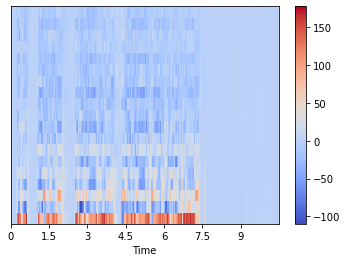

In [25]:
librosa.display.specshow(numpy_datas[200][0], sr=fs, x_axis='time')
plt.colorbar()

In [27]:
numpy_datas[200][0].shape[1]

903

In [24]:
# find the max size of mfcc and use it to reshape all mfccs into the same shape
mfcc_size = []
for i in range(len(numpy_datas)):
    mfcc_size.append(numpy_datas[i][0].shape[1])
max(mfcc_size)

1841

In [29]:
# resize into (19,1841) with 0 as padding
for i in range(len(numpy_datas)):
    numpy_datas[i][0] = np.pad(numpy_datas[i][0], ((0, 0),(0, 1841-numpy_datas[i][0].shape[1])), 'constant', constant_values=(0,0))

In [30]:
numpy_datas[200][0].shape

(19, 1841)

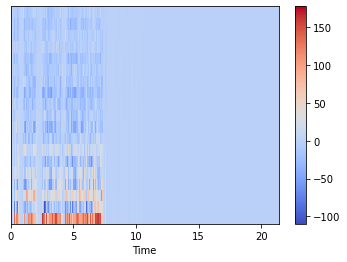

In [31]:
# try to retrieve the original example 
librosa.display.specshow(numpy_datas[200][0], sr=fs, x_axis='time')
plt.colorbar()

Separate the data list according to the label. Change file name to correct label. [1,0,0] is angry, [0,1,0] is happy, [0,0,1] is normal.

In [32]:
# change file name to correct label
angry = []
happy = []
normal = []

for i in range(len(numpy_datas)):
    file_name = numpy_datas[i][1]
    if "angry" in file_name:
        numpy_datas[i][1] = np.array([1,0,0])
        angry.append(numpy_datas[i])
    elif "happy" in file_name:
        numpy_datas[i][1] = np.array([0,1,0])
        happy.append(numpy_datas[i])
    else:
        numpy_datas[i][1] = np.array([0,0,1])
        normal.append(numpy_datas[i])

In [33]:
# check list with a certain emotion label
len(angry)

300

In [34]:
# check the shape of label
angry[0][1].shape

(3,)

Now split the Train-Valid-Test data with a ratio of 60%-20%-20%

In [35]:
# first shuffle the list of each emotion
random.shuffle(angry)
random.shuffle(happy)
random.shuffle(normal)

In [36]:
# then select the first 180 in each emotion as train data, first 60 in each emotion as valid data, and first 60 in each emotion as test data
train_data = angry[:int(len(angry)*0.6)] + happy[:int(len(happy)*0.6)] + normal[:int(len(normal)*0.6)]
valid_data = angry[int(len(angry)*0.6):int(len(angry)*(0.6+0.2))] + happy[int(len(happy)*0.6):int(len(happy)*(0.6+0.2))] + normal[int(len(normal)*0.6):int(len(normal)*(0.6+0.2))]
test_data = angry[int(len(angry)*(0.6+0.2)):] + happy[int(len(happy)*(0.6+0.2)):] + normal[int(len(normal)*(0.6+0.2)):]
random.shuffle(train_data)
random.shuffle(valid_data)
random.shuffle(test_data)

In [37]:
train_data

[[array([[0.        , 0.8417208 , 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 0.8342818 , 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 0.82195175, 0.        , ..., 0.        , 0.        ,
          0.        ],
         ...,
         [0.        , 0.2515462 , 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 0.1952031 , 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 0.13884753, 0.        , ..., 0.        , 0.        ,
          0.        ]], dtype=float32),
  array([0, 1, 0])],
 [array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  array([0, 1, 0])],
 [array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0